In [13]:
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [14]:
data=sns.load_dataset("iris")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [15]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [16]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
l=['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']
for i in l:
    data[i]=le.fit_transform(data[i])
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,8,14,4,1,0
1,6,9,4,1,0
2,4,11,3,1,0
3,3,10,5,1,0
4,7,15,4,1,0
...,...,...,...,...,...
145,24,9,28,19,2
146,20,4,26,15,2
147,22,9,28,16,2
148,19,13,30,19,2


In [18]:
x=data.drop("species",axis=1)
x

,sepal_length,sepal_width,petal_length,petal_width
0,8,14,4,1
1,6,9,4,1
2,4,11,3,1
3,3,10,5,1
4,7,15,4,1
...,...,...,...,...
145,24,9,28,19
146,20,4,26,15
147,22,9,28,16
148,19,13,30,19


In [19]:
y=data["species"]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

C:\Users\Lenovo\a\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


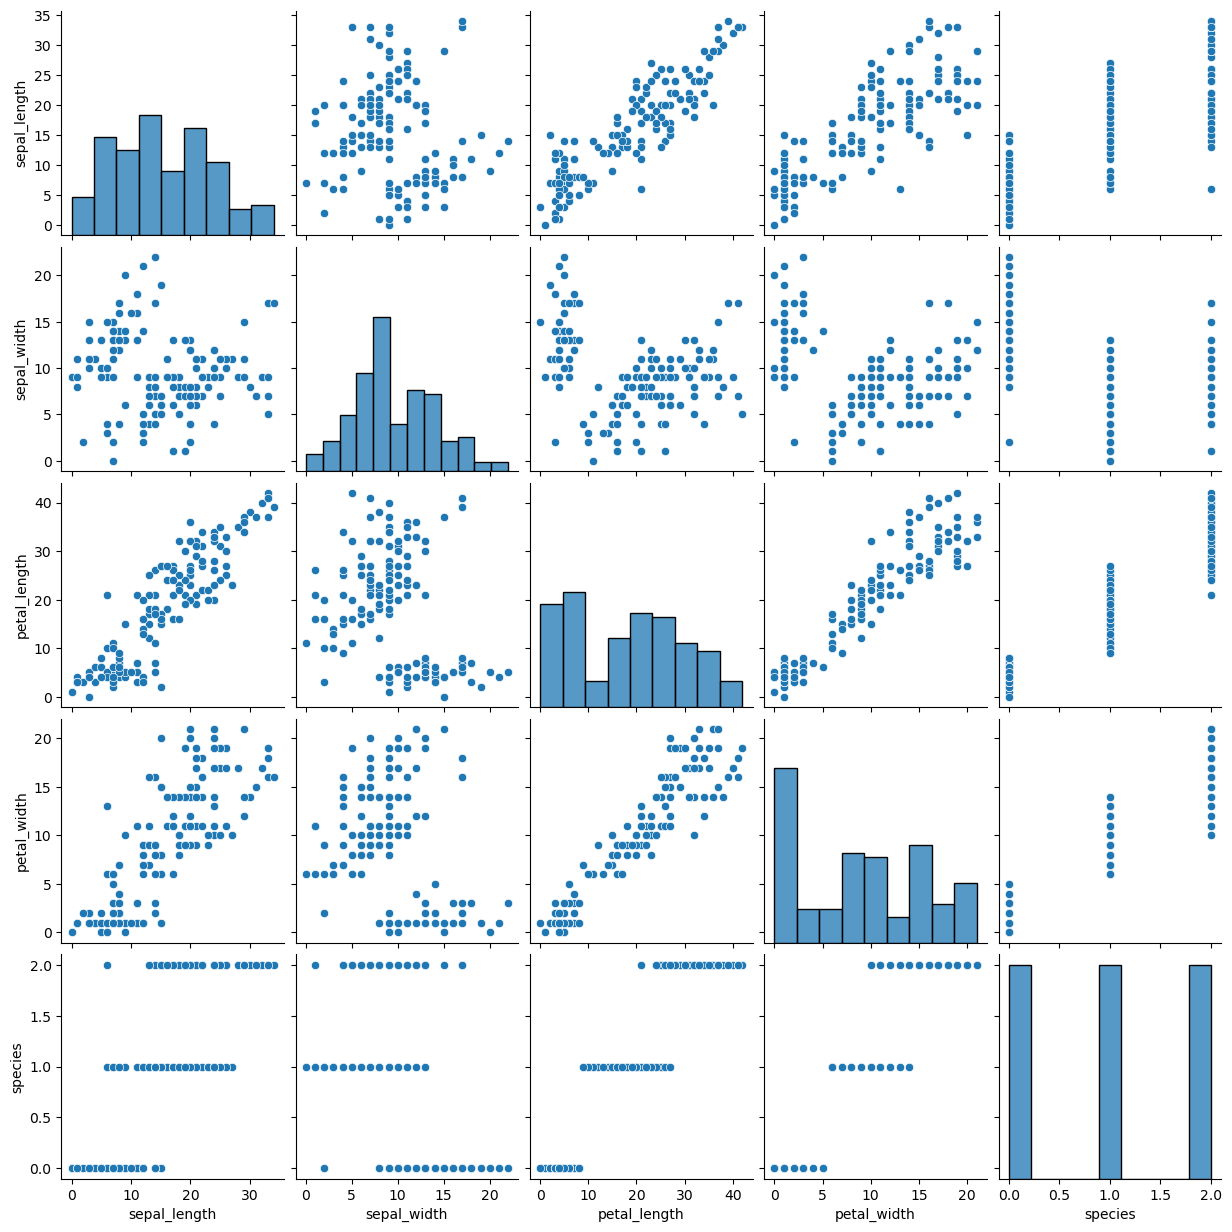

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data)
plt.show()

<Axes: xlabel='species'>

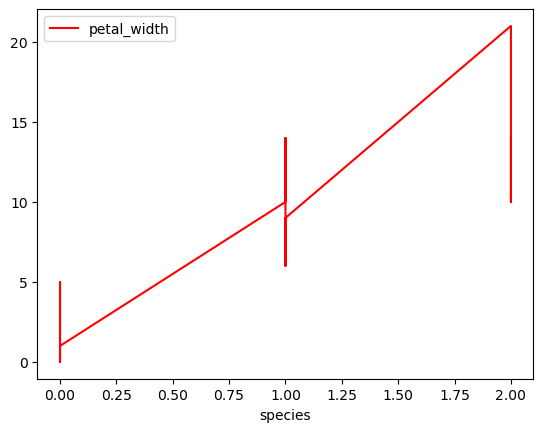

In [21]:
data.plot("species","petal_width",c="red")

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=20)

In [24]:
from sklearn.tree import DecisionTreeClassifier
clss=DecisionTreeClassifier(criterion="entropy")

In [25]:
clss.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
d=clss.predict(xtest)
d

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1])

In [28]:
a1=accuracy_score(ytest,d)*100
a1

93.33333333333333

In [29]:
d1=clss.predict(xtrain)
d1

array([1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 2,
       0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2,
       1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 2,
       2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2,
       0, 0, 0, 2, 1, 0, 1, 2, 0, 1])

In [30]:
a2=accuracy_score(ytrain,d1)*100
a2

100.0

In [31]:
v=[[8,14,4,1]]
w=clss.predict(v)
w

C:\Users\Lenovo\a\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [32]:
import matplotlib.pyplot as plt
from sklearn import tree

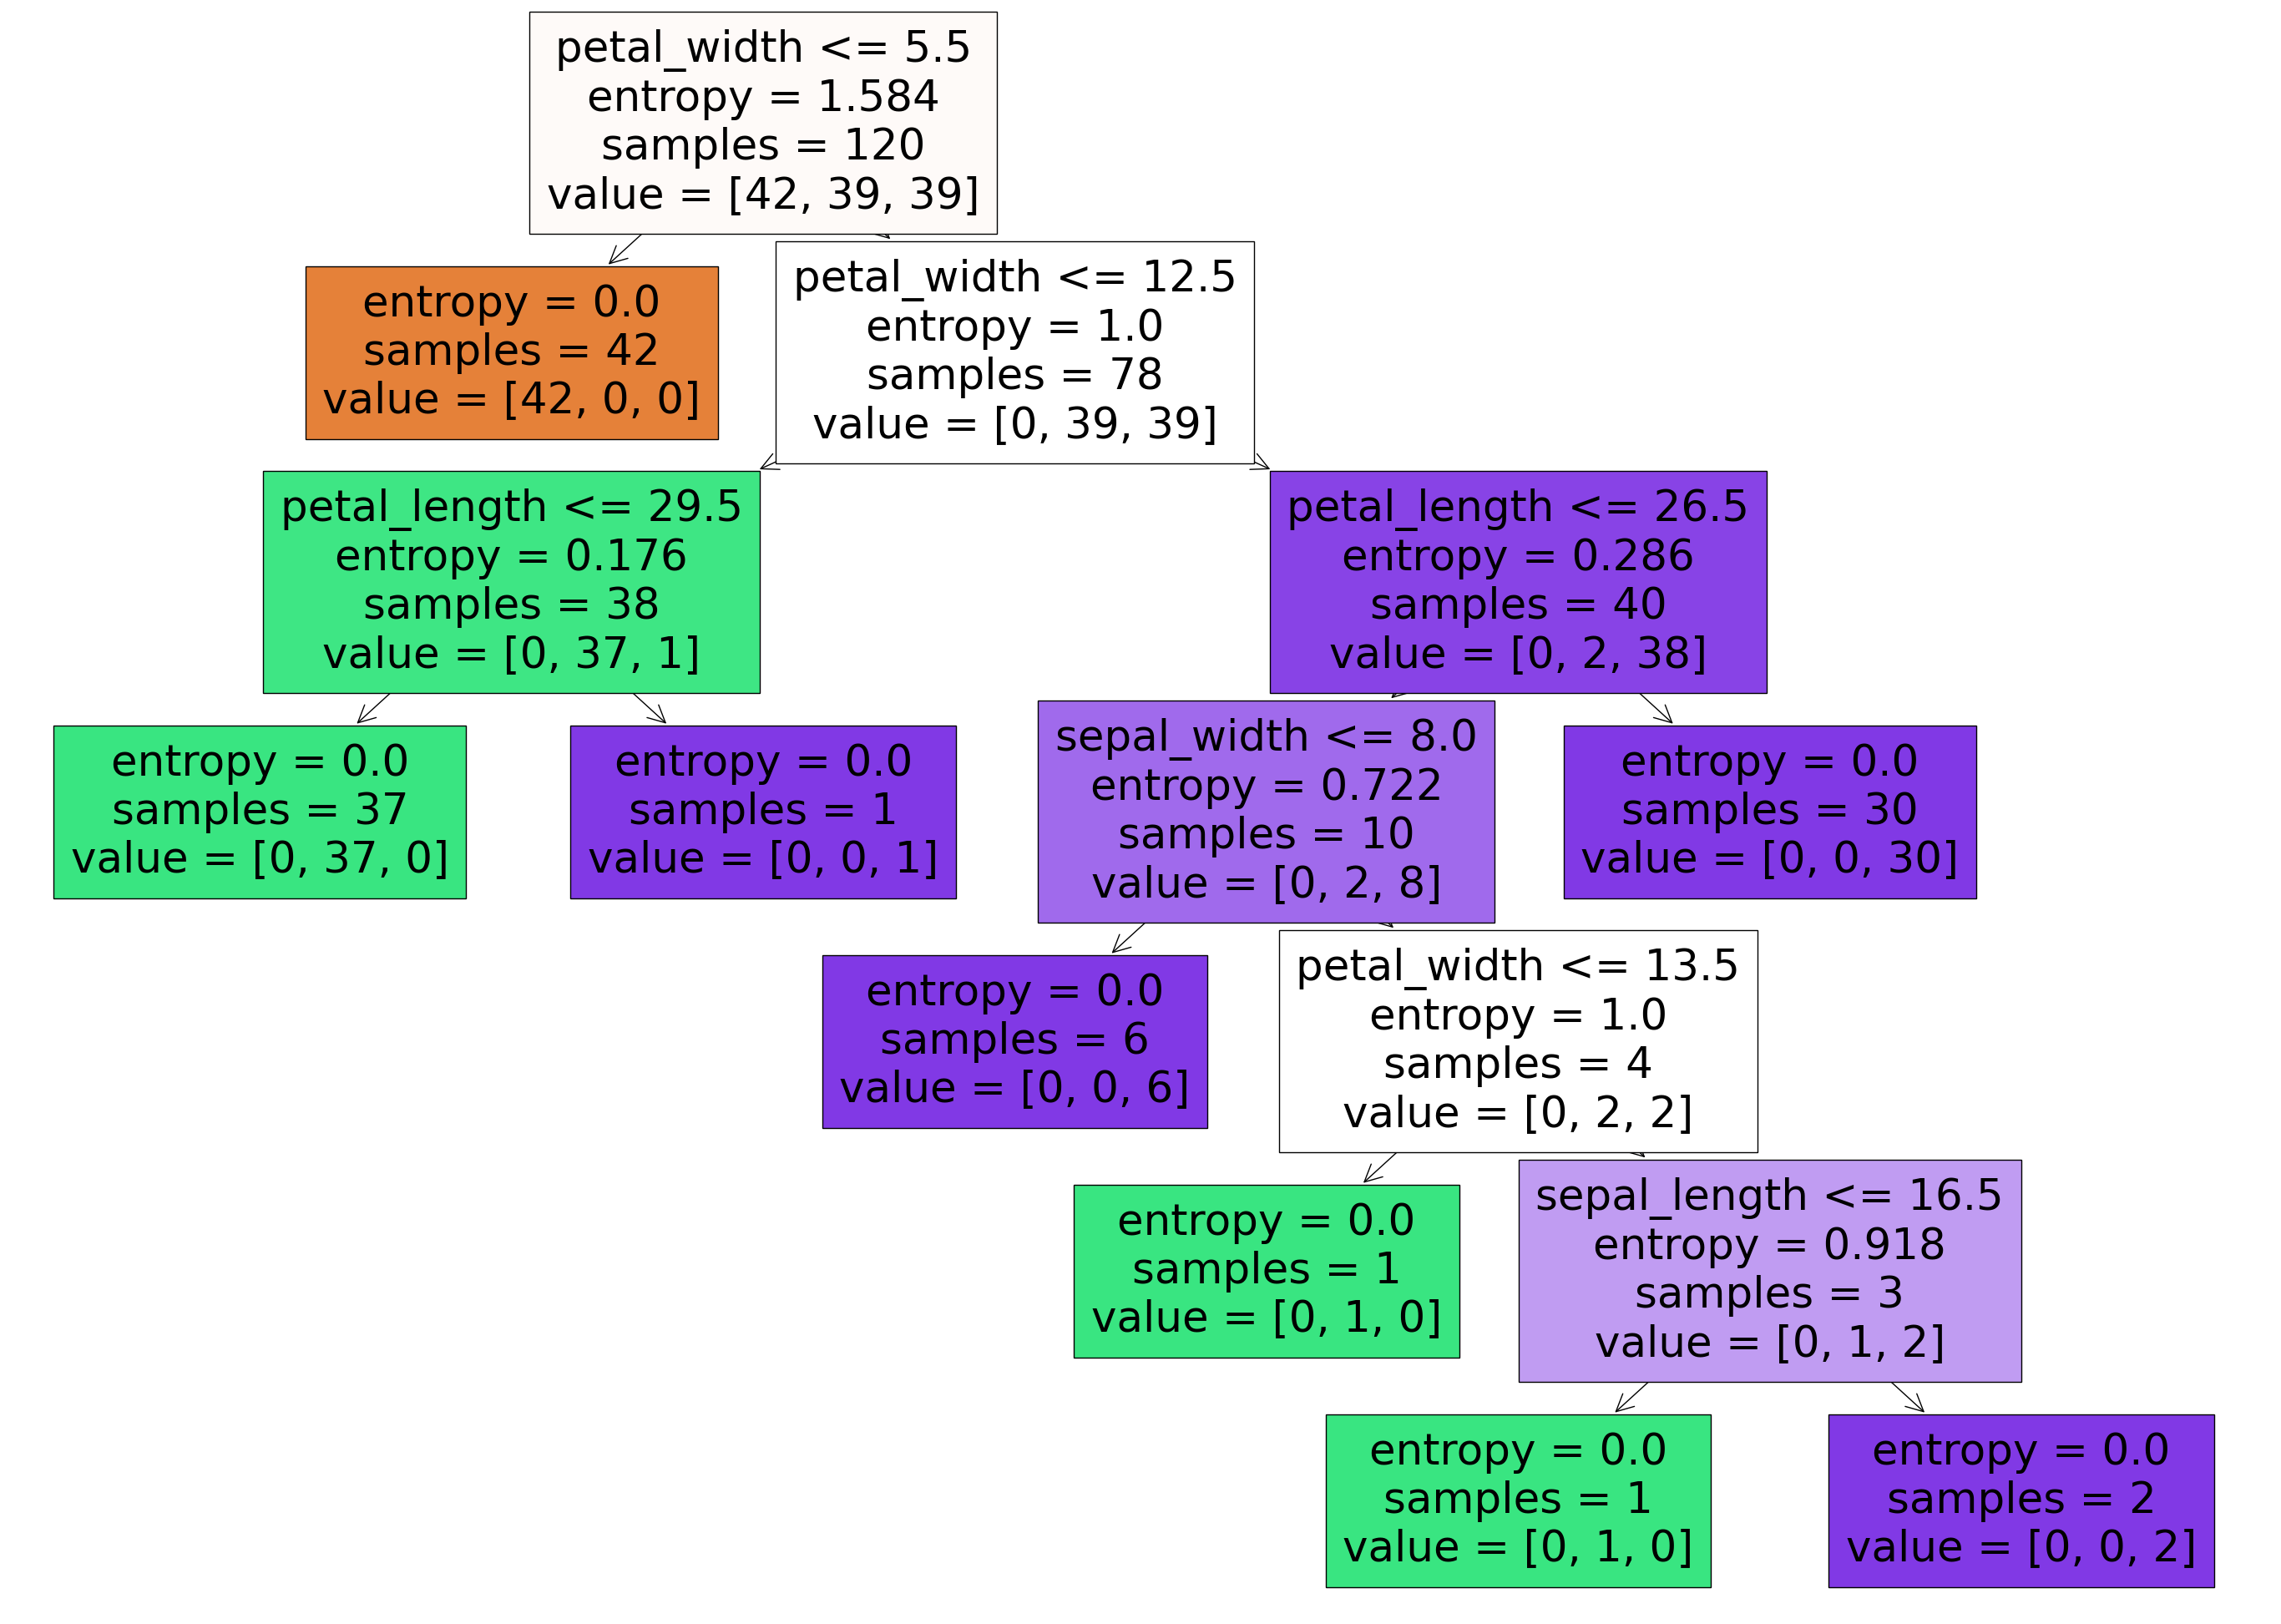

In [33]:
plt.figure(figsize=(35,25))
tree.plot_tree(clss,feature_names=x.columns.tolist(),filled=True,max_depth=7)
plt.show()

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [35]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [36]:
d=rf.predict(xtest)
d

array([0, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1])

In [37]:
a1=accuracy_score(ytest,d)*100
a1

90.0

In [38]:
d1=rf.predict(xtrain)
d1

array([1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 2,
       0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2,
       1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 2,
       2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2,
       0, 0, 0, 2, 1, 0, 1, 2, 0, 1])

In [39]:
a2=accuracy_score(ytrain,d1)*100
a2

100.0

In [40]:
v=[[8,14,4,1]]
w=rf.predict(v)
w

C:\Users\Lenovo\a\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [41]:
from sklearn.svm import SVC

In [42]:
c=SVC()

In [43]:
c.fit(xtrain,ytrain)

SVC()

In [44]:
d=c.predict(xtest)
d

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1])

In [45]:
a1=accuracy_score(ytest,d)*100
a1

96.66666666666667

In [46]:
d1=c.predict(xtrain)
d1

array([1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 2,
       0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2,
       1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 2,
       2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2,
       0, 0, 0, 2, 1, 0, 1, 2, 0, 1])

In [47]:
a2=accuracy_score(ytrain,d1)*100
a2

99.16666666666667

In [48]:
v=[[8,14,4,1]]
w=c.predict(v)
w

C:\Users\Lenovo\a\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [49]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [50]:
g=GaussianNB()

In [51]:
g.fit(xtrain,ytrain)

GaussianNB()

In [52]:
d=g.predict(xtest)
d

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1])

In [53]:
a1=accuracy_score(ytest,d)*100
a1

93.33333333333333

In [54]:
d1=g.predict(xtrain)
d1

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 2,
       0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2,
       2, 2, 2, 2, 1, 0, 2, 0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 2,
       2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2,
       0, 0, 0, 2, 1, 0, 1, 2, 0, 1])

In [55]:
a2=accuracy_score(ytrain,d1)*100
a2

96.66666666666667

In [56]:
v=[[8,14,4,1]]
w=g.predict(v)
w

C:\Users\Lenovo\a\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

In [57]:
b=BernoulliNB()

In [58]:
b.fit(xtrain,ytrain)

BernoulliNB()

In [59]:
d=b.predict(xtest)
d

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [60]:
a1=accuracy_score(ytest,d)*100
a1

43.333333333333336

In [61]:
d1=b.predict(xtrain)
d1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2])

In [62]:
a2=accuracy_score(ytrain,d1)*100
a2

36.666666666666664

In [63]:
v=[[8,14,4,1]]
w=b.predict(v)
w

C:\Users\Lenovo\a\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


array([2])

In [64]:
m=MultinomialNB()

In [65]:
m.fit(xtrain,ytrain)

MultinomialNB()

In [66]:
d=m.predict(xtest)
d

array([0, 1, 1, 1, 1, 2, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 2, 1, 2, 0, 2, 2])

In [67]:
a1=accuracy_score(ytest,d)*100
a1

83.33333333333334

In [68]:
d1=m.predict(xtrain)
d1

array([1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 2,
       0, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 2, 1,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 0, 0, 0, 2,
       1, 1, 1, 2, 2, 0, 2, 0, 2, 1, 0, 1, 1, 2, 0, 0, 1, 2, 2, 2, 1, 2,
       2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 2, 2,
       0, 0, 0, 2, 1, 0, 1, 2, 0, 1])

In [69]:
a2=accuracy_score(ytrain,d1)*100
a2

81.66666666666667

In [70]:
v=[[8,14,4,1]]
w=m.predict(v)
w

C:\Users\Lenovo\a\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array([0])

In [71]:
from sklearn.ensemble import AdaBoostClassifier

In [72]:
ad=AdaBoostClassifier()

In [73]:
ad.fit(xtrain,ytrain)

AdaBoostClassifier()

In [74]:
d=ad.predict(xtest)
d

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 1, 1,
       2, 0, 1, 1, 1, 0, 2, 1])

In [75]:
a1=accuracy_score(ytest,d)*100
a1

83.33333333333334

In [76]:
d1=ad.predict(xtrain)
d1

array([1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 2,
       0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 2, 0, 0, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2,
       1, 1, 2, 1, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 2,
       2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2,
       0, 0, 0, 2, 1, 0, 1, 2, 0, 1])

In [77]:
a2=accuracy_score(ytrain,d1)*100
a2

92.5

In [78]:
v=[[8,14,4,1]]
w=ad.predict(v)
w

C:\Users\Lenovo\a\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


array([0])

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
gb=GradientBoostingClassifier()

In [81]:
gb.fit(xtrain,ytrain)

GradientBoostingClassifier()

In [82]:
d=gb.predict(xtest)
d

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 0, 0, 2, 1])

In [83]:
a1=accuracy_score(ytest,d)*100
a1

90.0

In [84]:
d1=gb.predict(xtrain)
d1

array([1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 2,
       0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2,
       1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 2,
       2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2,
       0, 0, 0, 2, 1, 0, 1, 2, 0, 1])

In [85]:
a2=accuracy_score(ytrain,d1)*100
a2

100.0

In [86]:
v=[[8,14,4,1]]
w=gb.predict(v)
w

C:\Users\Lenovo\a\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([0])

In [87]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [88]:
from xgboost import XGBClassifier



In [89]:
xg=XGBClassifier()

In [90]:
xg.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [91]:
d=xg.predict(xtest)
d

array([0, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 0, 0, 2, 1], dtype=int64)

In [92]:
a1=accuracy_score(ytest,d)*100
a1

86.66666666666667

In [93]:
d1=xg.predict(xtrain)
d1

array([1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 2,
       0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2,
       1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 2,
       2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2,
       0, 0, 0, 2, 1, 0, 1, 2, 0, 1], dtype=int64)

In [94]:
a2=accuracy_score(ytrain,d1)*100
a2

100.0

In [95]:
v=[[8,14,4,1]]
w=xg.predict(v)
w

array([0], dtype=int64)